# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#variable list
cityname = []
cloudiness= []
country= []
date = []
humidity= []
lat = []
lng= []
maxtemp = []
windspeed = []
index_counter = 0
set_counter = 1

In [50]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("No city found...Skipping")

Processing Record 17 of Set 12 : hilo
Processing Record 18 of Set 12 : bredasdorp
Processing Record 19 of Set 12 : hamilton
No city found...Skipping
Processing Record 20 of Set 12 : caravelas
Processing Record 21 of Set 12 : ostrovnoy
Processing Record 22 of Set 12 : beringovskiy
Processing Record 23 of Set 12 : new norfolk
Processing Record 24 of Set 12 : busselton
No city found...Skipping
Processing Record 25 of Set 12 : teknaf
Processing Record 26 of Set 12 : iskateley
Processing Record 27 of Set 12 : carnarvon
Processing Record 28 of Set 12 : hermanus
Processing Record 29 of Set 12 : vaini
Processing Record 30 of Set 12 : albany
Processing Record 31 of Set 12 : mataura
Processing Record 32 of Set 12 : butaritari
Processing Record 33 of Set 12 : casper
Processing Record 34 of Set 12 : agadez
Processing Record 35 of Set 12 : barrow
Processing Record 36 of Set 12 : bom jardim
Processing Record 37 of Set 12 : urubicha
Processing Record 38 of Set 12 : quesnel
Processing Record 39 of Set

Processing Record 49 of Set 15 : meulaboh
Processing Record 50 of Set 15 : cidreira
Processing Record 0 of Set 16 : elverum
Processing Record 1 of Set 16 : hakodate
Processing Record 2 of Set 16 : araouane
No city found...Skipping
Processing Record 3 of Set 16 : kruisfontein
Processing Record 4 of Set 16 : asyut
Processing Record 5 of Set 16 : saint pete beach
Processing Record 6 of Set 16 : namatanai
Processing Record 7 of Set 16 : kashi
Processing Record 8 of Set 16 : menongue
Processing Record 9 of Set 16 : hualmay
Processing Record 10 of Set 16 : mazyr
Processing Record 11 of Set 16 : el dorado
Processing Record 12 of Set 16 : lavrentiya
Processing Record 13 of Set 16 : plouzane
Processing Record 14 of Set 16 : mpanda
Processing Record 15 of Set 16 : varlamovo
Processing Record 16 of Set 16 : mitsamiouli
Processing Record 17 of Set 16 : beya
Processing Record 18 of Set 16 : laguna
Processing Record 19 of Set 16 : nacozari
Processing Record 20 of Set 16 : tautira
Processing Record 2

Processing Record 31 of Set 19 : sisimiut
Processing Record 32 of Set 19 : komsomolskiy
Processing Record 33 of Set 19 : fenoarivo atsinanana
Processing Record 34 of Set 19 : santa eulalia
Processing Record 35 of Set 19 : amarpur
Processing Record 36 of Set 19 : santa rosa del sur
Processing Record 37 of Set 19 : san bernardo
Processing Record 38 of Set 19 : zhenlai
No city found...Skipping
Processing Record 39 of Set 19 : nizhniy chir
Processing Record 40 of Set 19 : pacific grove
Processing Record 41 of Set 19 : south lake tahoe
Processing Record 42 of Set 19 : troyes
Processing Record 43 of Set 19 : kandrian
Processing Record 44 of Set 19 : saint-francois
Processing Record 45 of Set 19 : ormond beach
Processing Record 46 of Set 19 : isla vista
Processing Record 47 of Set 19 : puerto madryn
Processing Record 48 of Set 19 : petropavlovsk-kamchatskiy
Processing Record 49 of Set 19 : korla
Processing Record 50 of Set 19 : fortuna
Processing Record 0 of Set 20 : veshenskaya
Processing Re

Processing Record 12 of Set 23 : pindushi
Processing Record 13 of Set 23 : foeni
Processing Record 14 of Set 23 : portland
Processing Record 15 of Set 23 : katsuura
Processing Record 16 of Set 23 : sarangpur
No city found...Skipping
Processing Record 17 of Set 23 : san patricio
Processing Record 18 of Set 23 : rassvet
Processing Record 19 of Set 23 : ontario
Processing Record 20 of Set 23 : ozernovskiy
Processing Record 21 of Set 23 : kalabo
Processing Record 22 of Set 23 : worland
No city found...Skipping
Processing Record 23 of Set 23 : almeirim
Processing Record 24 of Set 23 : beatrice
Processing Record 25 of Set 23 : honiara
Processing Record 26 of Set 23 : sturgeon falls
Processing Record 27 of Set 23 : vostok
Processing Record 28 of Set 23 : merritt island
Processing Record 29 of Set 23 : mujiayingzi
Processing Record 30 of Set 23 : ballina
Processing Record 31 of Set 23 : bubaque
Processing Record 32 of Set 23 : foumban


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({ 
                "City" : cityname,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : maxtemp,
                "Wind Speed" : windspeed
})
weather_df.count()

City          577
Cloudiness    577
Country       577
Date          577
Humidity      577
Lat           577
Lng           577
Max Temp      577
Wind Speed    577
dtype: int64

In [7]:
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,90,US,1633023610,94,19.7297,-155.0900,73.80,6.91
1,Bredasdorp,64,ZA,1633023856,77,-34.5322,20.0403,60.12,12.66
2,Hamilton,75,US,1633023820,48,39.1834,-84.5333,79.23,1.01
3,Caravelas,25,BR,1633023789,60,-17.7125,-39.2481,82.02,10.98
4,Ostrovnoy,75,RU,1633023891,87,68.0531,39.5131,43.07,3.06
...,...,...,...,...,...,...,...,...,...
572,Merritt Island,20,US,1633024102,60,28.5392,-80.6720,90.10,9.22
573,Mujiayingzi,2,CN,1633024102,62,42.1167,118.7833,49.30,2.55
574,Ballina,40,AU,1633023830,88,-28.8667,153.5667,64.36,10.36
575,Bubaque,23,GW,1633023886,75,11.2833,-15.8333,82.89,10.71


In [10]:
#exporting dataframe to csv 
weather_df.to_csv("cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

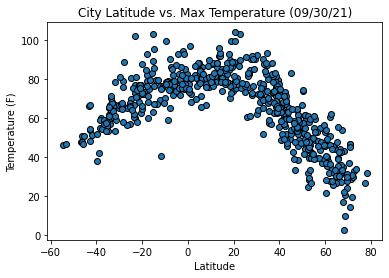

In [27]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title("City Latitude vs. Max Temperature (09/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

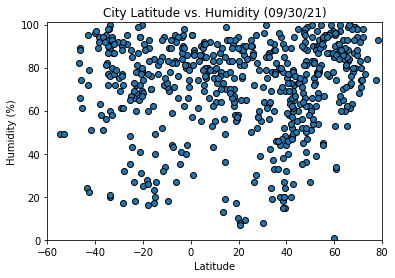

In [28]:
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title("City Latitude vs. Humidity (09/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-60,80)
plt.ylim(0,101)
plt.show()

## Latitude vs. Cloudiness Plot

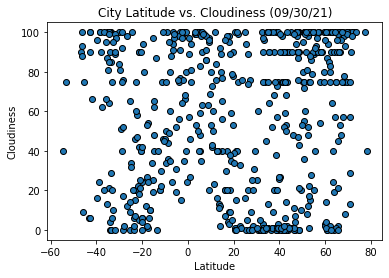

In [29]:
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title("City Latitude vs. Cloudiness (09/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

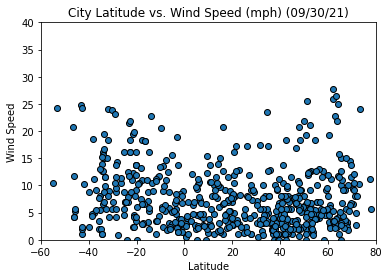

In [30]:
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")
plt.title("City Latitude vs. Wind Speed (mph) (09/30/21)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(-60,80)
plt.ylim(0,40)
plt.show()

In [31]:
# Northern = greater than or equal to 0 degrees latitude; Southern = less than 0 degrees latitude
northern_lat = weather_df.loc[weather_df["Lat"]>=0]
southern_lat = weather_df.loc[weather_df["Lat"]<0]

## Linear Regression

In [41]:
def lin_reg (x_values, y_values, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=10,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

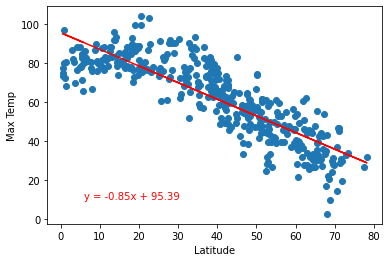

In [42]:
lin_reg(northern_lat['Lat'], northern_lat['Max Temp'],'Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

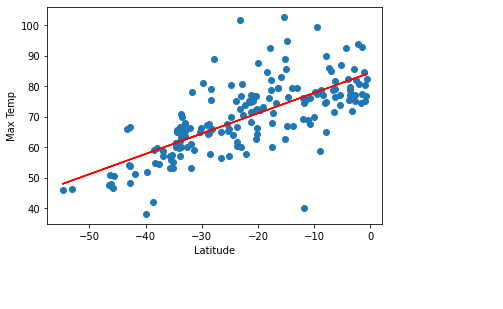

In [43]:
lin_reg(southern_lat['Lat'], southern_lat['Max Temp'],'Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

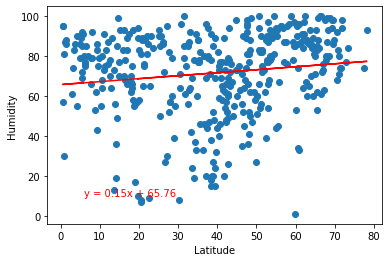

In [44]:
lin_reg(northern_lat['Lat'], northern_lat['Humidity'],'Humidity')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

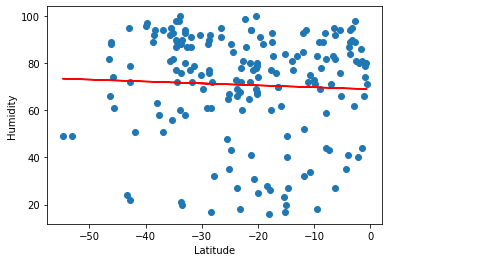

In [45]:
lin_reg(southern_lat['Lat'], southern_lat['Humidity'],'Humidity')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

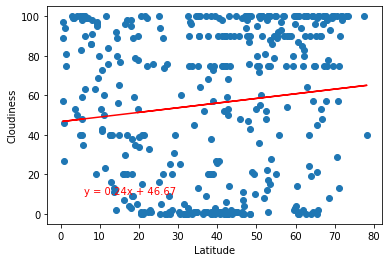

In [46]:
lin_reg(northern_lat['Lat'], northern_lat['Cloudiness'],'Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

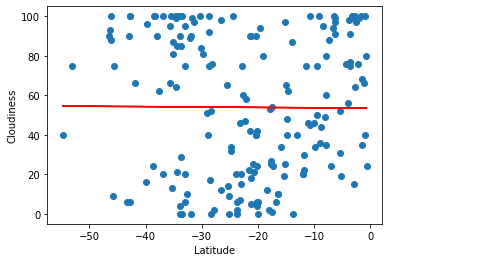

In [47]:
lin_reg(southern_lat['Lat'], southern_lat['Cloudiness'],'Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

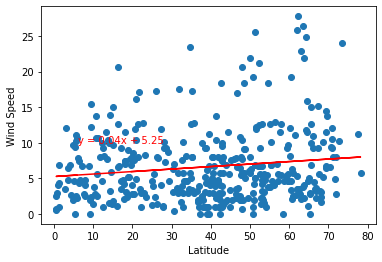

In [48]:
lin_reg(northern_lat['Lat'], northern_lat['Wind Speed'],'Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

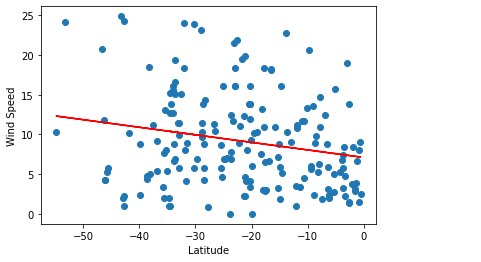

In [49]:
lin_reg(southern_lat['Lat'], southern_lat['Wind Speed'],'Wind Speed')